# MNIST

MNIST stands for Modified National Institue of Standards and Technology

The MNIST database of handwritten digits has a training set of 60,000 examples of digits and a test set of 10,000 examples of digits. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

For reference, see: http://yann.lecun.com/exdb/mnist/


In [1]:
# IMPORTS
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from sklearn.metrics import classification_report

from keras.datasets import mnist

In [2]:
# LOADING DATA INTO TRAIN AND TEST SETS

(x_train, y_train), (x_test, y_test) = mnist.load_data()

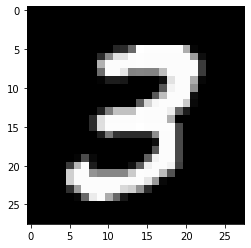

In [3]:
# VISUALIZING DATA

plt.imshow(x_train[7], cmap = "gray")

In [4]:
# LABELS (Y) NEED TO BE ONE-HOT ENCODED SO CNN WOULD UNDERSTAND

y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [5]:
# NORMALIZING DATA (X) TO MAKE IT EASIER FOR PROCESSING

x_train = x_train/255
x_test = x_test/255

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
# THE CNN NEEDS TO KNOW THAT WE ARE DEALING WITH 1 RGB CHANNEL - BLACK AND 
# WHITE IMAGES. SO WE NEED TO ADD ANOTHER DIMENSION TO BOTH X_TRAIN AND X_TEST

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [8]:
# TRAINING THE MODEL

model = Sequential()

In [9]:
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters = 32, kernel_size = (4, 4), 
                 input_shape = (28, 28, 1), activation = "relu"))

# POOLING LAYER
model.add(MaxPool2D(pool_size = (2, 2)))

# FLATTEN IMAGES FROM 28 * 28 TO 764 BEFORE THE FINAL LAYER 
model.add(Flatten())

# HIDDEN LAYER - MORE CAN BE ADDED
model.add(Dense(128, activation = "relu"))

# CLASSIFIER - 10 CLASSES (0-9)
model.add(Dense(10, activation = "softmax"))

# MODEL COMPILATION
model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop",
             metrics = ["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [11]:
# FIT THE MODEL WITH 5 (CAN BE CHANGED) EPOCHS

model.fit(x_train, y_cat_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1355 - accuracy: 0.9583
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0493 - accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0359 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0281 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0230 - accuracy: 0.9935


In [12]:
# LIST THE METRICS AVAILABLE

model.metrics_names

['loss', 'accuracy']

In [13]:
# EVALUATE THE MODEL - LOSS AND ACCURACY

model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0433 - accuracy: 0.9881


[0.043305784463882446, 0.988099992275238]

In [14]:
# MAKE PREDICTIONS

predictions = model.predict(x_test)

In [15]:
predictions

array([[2.32432573e-10, 4.30921687e-11, 1.60147930e-08, ...,
        9.99999762e-01, 1.85899616e-08, 4.31033307e-08],
       [1.45482161e-12, 8.49456416e-09, 1.00000000e+00, ...,
        6.28235337e-17, 2.61026378e-12, 3.00120334e-13],
       [6.65460504e-08, 9.99854922e-01, 4.41577725e-07, ...,
        4.06471263e-05, 3.11492477e-05, 3.64735655e-07],
       ...,
       [7.05688771e-15, 6.83105572e-09, 8.23888614e-12, ...,
        4.08473255e-07, 8.43660109e-06, 7.39322275e-07],
       [1.87760051e-12, 4.15634351e-13, 3.79968689e-15, ...,
        5.65576774e-14, 1.06520907e-04, 2.92931859e-11],
       [6.19069954e-14, 1.08361084e-16, 5.19655289e-14, ...,
        1.08162638e-20, 6.22265978e-15, 1.67882322e-15]], dtype=float32)

In [16]:
# GENERATE A CLASSIFICATION REPORT BASED ON THE CATEGORICAL Y_TEST VALUES
# AND PREDICTIONS

# WE USE PREDICTIONS.ROUND() BECAUSE OF THE RESULT SHOWN IN THE ABOVE CELL

print(classification_report(y_cat_test, predictions.round()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



C:\Users\srini\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# WHAT IS THE PREDICTION IN THE 19TH INDEX?
# 4

np.argmax(predictions[19])

4

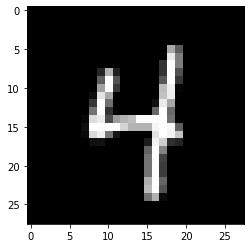

In [18]:
# VERIFY IF THE PREDICTED VALUE IS CORRECT BY VISUALIZING IT
# 4

plt.imshow(x_test[19], cmap = "gray")